In [1]:
def normalize(data):
    data = np.delete(data,np.where(~data.any(axis=0))[0], axis=1)
    data = (data - np.mean(data,axis=0))/np.std(data,axis=0)
    return data

data = pd.read_csv("data.csv")
data = data.values
X = data[:,:-1]
y = data[:,-1]
#X = normalize(X)

w = np.ones(X.shape[0])/X.shape[0]
for i in range(X.shape[1]):
    h = DecisionTreeClassifier(max_depth=1)
    h.fit(X[:,i].reshape(-1, 1), y, sample_weight=w)
    pred = h.predict(X[:,i].reshape(-1, 1))
    print("Error rate for column",i,sum(pred!=y)/X.shape[0])
#By this all columns are weak predictors with carpet damage having lowest error rate
#so we can use all of the features in our ADABOOST implementation

NameError: name 'pd' is not defined

In [95]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from statistics import mode



# input: dataset X and labels y (in {+1, -1})
hypotheses = []
alphat = []
w = np.ones(X.shape[0])/X.shape[0]

for t in range(10):
    Gt = DecisionTreeClassifier(max_depth=1)

    Gt.fit(X, y, sample_weight=w)
    Gtx = Gt.predict(X) #get predictions using above generated tree 

    Et = w.dot(pred != y) 
    alpha = (np.log(1 - Et) - np.log(Et)) / 2

    w = w * np.exp(-alpha*y*Gtx)
    Zt = w.sum()
    w = w / Zt #Zt used to normalize the weights to ensure it is a probability distribution

    hypotheses.append(Gt) #add hypothesis t to a list
    alphat.append(alpha) #append the weight for the above weak hypothesis

Xt = np.array([3,0,0,0]) #test values given in question
Xt = Xt.reshape(1, -1)

for (h, alpha) in zip(hypotheses, hypothesis_weights):
    y = y + alpha * h.predict(Xt)
y = np.sign(y)

print("The label for given test point is:",mode(y))

The label for given test point is: 1.0


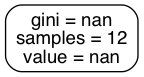

In [96]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


In [97]:
from sklearn.tree import export_graphviz
export_graphviz(estimator_limited, out_file='tree_limited.dot', feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, precision = 2, filled = True)

NameError: name 'estimator_limited' is not defined

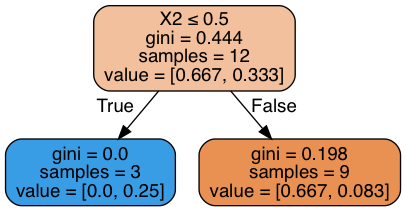

In [220]:
import sklearn.datasets as datasets
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

w = np.ones(X.shape[0])/X.shape[0] #initialize w
df = pd.DataFrame(data=X[0:,0:], columns=["Potty Train","Price","Carpet Damage","Color"]) #create pandas df
dtree=DecisionTreeClassifier(max_depth=1)
dtree.fit(df,y,sample_weight=w)
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

[ 0.06297229  0.10075567  0.06297229  0.10075567  0.06297229  0.06297229
  0.06297229  0.06297229  0.06297229  0.06297229  0.23173804  0.06297229]


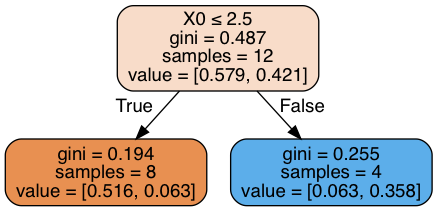

In [223]:
#modified adaboost for purposes of drawing trees
def adaboost(X,y,w):
    Gt = DecisionTreeClassifier(max_depth=1)
    Gt.fit(X, y, sample_weight=w)
    Gtx = Gt.predict(X) #get predictions using above generated tree 
    Et = w.dot(pred != y) 
    alpha = (np.log(1 - Et) - np.log(Et)) / 2
    w = w * np.exp(-alpha*y*Gtx)
    Zt = w.sum()
    w = w / Zt #Zt used to normalize the weights to ensure it is a probability distribution
    return (w)

w = adaboost(X,y,w)
dtree=DecisionTreeClassifier(max_depth=1)
dtree.fit(df,y,sample_weight=w)
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
print(w)
Image(graph.create_png())